In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

In [2]:
# generating data

def f(x):
    return 1 / (x ** 2 - 3 * x + 2)

n = 1000
xs, ys = [], []
for k in range(n + 1):
    x_k = 3 * k / 1000
    f_k = f(x_k)
    if f_k < -100:
        y_k = -100 + np.random.randn()
    elif -100 <= f_k <= 100:
        y_k = f_k + np.random.randn()
    else:
        y_k = 100 + np.random.randn()
    xs.append(x_k)
    ys.append(y_k)

In [3]:
def F(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def D(x, xs, ys, reduce="mean"):
    a, b, c, d = x
    result = np.array([(F(x, a, b, c, d) - y) ** 2 for x, y in zip(xs, ys)])
    
    if reduce == "sum":
        return result.sum()
    elif reduce == "mean":
        return result.mean()
    elif reduce == "none":
        return result
    else:
        raise Exception

In [4]:
x0 = np.random.uniform(0.25, 0.5, size=(4,))

In [5]:
result = optimize.minimize(D, x0, args=(xs, ys), method='Nelder-Mead', tol=0.001)
a_nm, b_nm, c_nm, d_nm = result.x

print("Nelder-Mead method:")
print(f"    fun: {D((a_nm, b_nm, c_nm, d_nm), xs, ys)}")
print(f"    nit: {result.nit}")
print(f"   nfev: {result.nfev}")
print(f"success: {result.success}")
print(f"      x: {result.x}")

Nelder-Mead method:
    fun: 135.10913761362323
    nit: 311
   nfev: 518
success: True
      x: [-1.0082889   1.00877972 -2.00096149  1.00097797]


In [6]:
result = optimize.least_squares(D, x0, args=(xs, ys, "none"), method='lm', xtol=0.001)
a_lm, b_lm, c_lm, d_lm = result.x

print("Levenberg-Marquardt algorithm:")
print(f"    fun: {D((a_lm, b_lm, c_lm, d_lm), xs, ys)}")
print(f"   nfev: {result.nfev}")
print(f"success: {result.success}")
print(f"      x: {result.x}")

Levenberg-Marquardt algorithm:
    fun: 136.12938933225212
   nfev: 202
success: True
      x: [-0.88904895  0.88956179 -2.00125502  1.00126884]


In [7]:
bounds = [(-10, 10) for _ in range(4)]
result = optimize.differential_evolution(D, bounds, args=(xs, ys), tol=0.001)
a_de, b_de, c_de, d_de = result.x

print("Differential evolution method:")
print(f"    fun: {D((a_de, b_de, c_de, d_de), xs, ys)}")
print(f"    nit: {result.nit}")
print(f"   nfev: {result.nfev}")
print(f"success: {result.success}")
print(f"      x: {result.x}")

Differential evolution method:
    fun: 135.1156197957309
    nit: 162
   nfev: 10360
success: True
      x: [-1.01219755  1.01266404 -2.0008666   1.00088324]


In [8]:
objective = lambda x: D(x, xs, ys)
result = optimize.basinhopping(objective, x0, niter_success=10)
a_ps, b_ps, c_ps, d_ps = result.x

print("Simulated annealing method:")
print(f"    fun: {D((a_ps, b_ps, c_ps, d_ps), xs, ys)}")
print(f"    nit: {result.nit}")
print(f"   nfev: {result.nfev}")
print(f"      x: {result.x}")

Simulated annealing method:
    fun: 135.19182587468714
    nit: 20
   nfev: 12282
      x: [-1.02217594  1.02263348 -2.0007198   1.00073747]


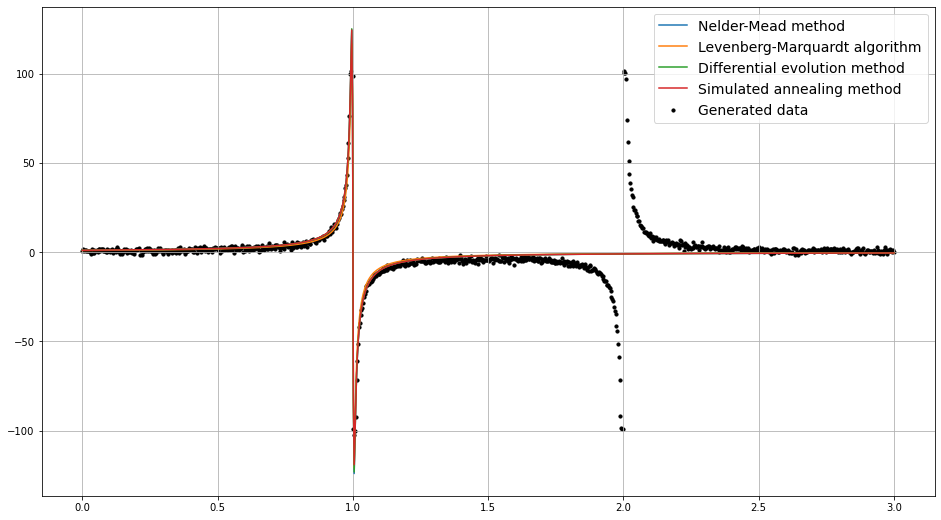

In [9]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.scatter(xs, ys, color="black", s=10)
plt.plot(xs, [F(x, a_nm, b_nm, c_nm, d_nm) for x in xs])
plt.plot(xs, [F(x, a_lm, b_lm, c_lm, d_lm) for x in xs])
plt.plot(xs, [F(x, a_de, b_de, c_de, d_de) for x in xs])
plt.plot(xs, [F(x, a_ps, b_ps, c_ps, d_ps) for x in xs])
plt.legend(["Nelder-Mead method", "Levenberg-Marquardt algorithm", "Differential evolution method", "Simulated annealing method", "Generated data"],
           fontsize=14)
plt.show()